<a href="https://colab.research.google.com/github/vimalrajanb/HR_Attrition_using_Random_Forest/blob/main/HR_Attrition_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#Getting the data from file
data= pd.read_csv('/content/hr_modified.csv')

In [ ]:
#Copying the data to Dataframe inorder to not lose any original data
df=data.copy()

In [ ]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,,NaN,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [ ]:
#Trimming the spaces in the data
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,,NaN,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [ ]:
#Replacing blanks with Nan
df.replace('', np.nan, inplace=True)

In [ ]:
# Checking Null values
df.isnull().sum()

Age                         0
BusinessTravel              2
DailyRate                   1
Department                  1
DistanceFromHome            0
Education                   0
EducationField              1
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               1
MonthlyRate                 1
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
# Dropping the null value rows from the dataset
df = df.dropna()

In [ ]:
df.columns.get_loc('Gender')

10

In [ ]:
# Specifying the columns where the column's data type had text but should be numeric
Columns = [
 'DailyRate',
 'MonthlyIncome',
 'MonthlyRate']

In [ ]:
# Converting those columns to Numeric using For loops
for column in Columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # 'coerce' sets non-convertible values to NaN

In [ ]:
# Getting the columns that has string data types to perform one hot encoding
string_columns = df.select_dtypes(include=['object'])
string_column_names = string_columns.columns.tolist()
string_column_names

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Attrition']

In [ ]:
# Deleting the last column as it should be the dependent variable
del string_column_names[-1]

In [ ]:
string_column_names

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
# Splitting the data into X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,...,3,80,0,8,2,2,7,7,3,6
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,...,1,80,3,12,3,2,1,0,0,0
7,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,...,2,80,1,1,2,3,1,0,0,0
8,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,...,2,80,0,10,2,3,9,7,1,8


In [ ]:
# Checking for nulls in X
X.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
y.head()

0    Yes
5     No
6     No
7     No
8     No
Name: Attrition, dtype: object

In [ ]:
# One hot encoding for the columns mentioned above and dropping the original columns
for column in string_column_names:
    one_hot_encoded = pd.get_dummies(X[column], drop_first=True)
    X = pd.concat([X, one_hot_encoded], axis=1)
    X.drop(column, axis=1, inplace=True)

In [ ]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
5,32,1005,2,2,1,8,4,79,3,1,...,1,0,0,0,0,0,0,0,1,0
6,59,1324,3,3,1,10,3,81,4,1,...,1,0,0,0,0,0,0,1,0,1
7,30,1358,24,1,1,11,4,67,3,1,...,1,0,0,0,0,0,0,0,0,0
8,38,216,23,3,1,12,4,44,2,3,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
# Importing decisiontreeclassifier from Scikit Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
model_decision_tree= DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Doing predictions for Single Decision Tree
model_decision_tree.fit(X_train,y_train)
y_pred_decision_tree= model_decision_tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_decision_tree)

0.7789256198347108

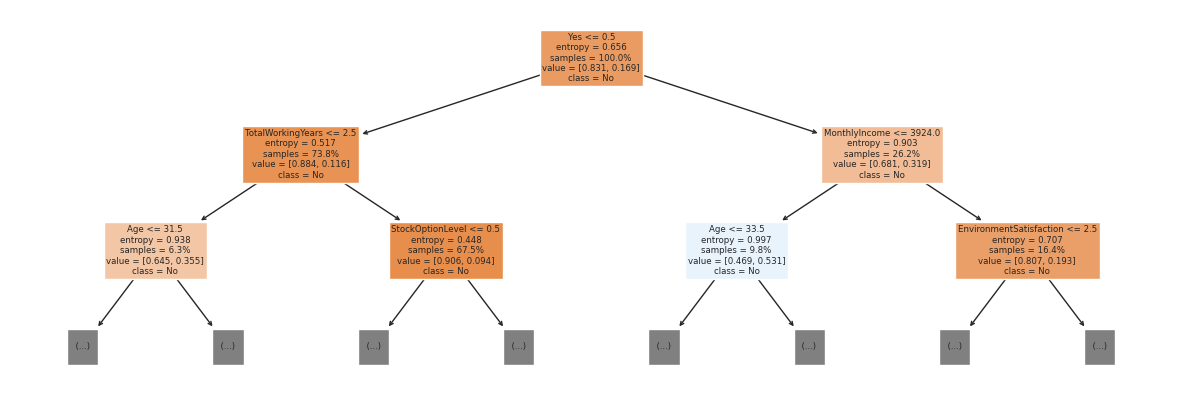

In [ ]:
plt.figure(figsize=(15,5))
model_decision_tree.fit(X_train,y_train)
y_label = y_train.replace([0,1],['Yes','No'])
y_label=y_label.values
plot_tree(model_decision_tree,feature_names= X_train.columns ,filled=True,class_names=y_label,max_depth=2,proportion=True);

In [ ]:
# Testing for a sample data from X_test
X_test.iloc[0]

Age                            49
DailyRate                     809
DistanceFromHome                1
Education                       3
EmployeeCount                   1
EmployeeNumber               1677
EnvironmentSatisfaction         3
HourlyRate                     36
JobInvolvement                  3
JobLevel                        4
JobSatisfaction                 3
MonthlyIncome               15379
MonthlyRate                 22384
NumCompaniesWorked              4
PercentSalaryHike              14
PerformanceRating               3
RelationshipSatisfaction        1
StandardHours                  80
StockOptionLevel                0
TotalWorkingYears              23
TrainingTimesLastYear           2
WorkLifeBalance                 3
YearsAtCompany                  8
YearsInCurrentRole              7
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Travel_Frequently               0
Travel_Rarely                   1
Research & Development          1
Sales         

In [ ]:
# Taking a sample row from X_test (the first row)
sample_row = X_test.iloc[0]

# Reshape the row into a DataFrame with the same columns as X_test
sample_df = pd.DataFrame([sample_row], columns=X_test.columns)

# Make a prediction for the single row
y_pred_sample = model_decision_tree.predict(sample_df)

In [ ]:
# Predicting for the first sample
y_pred_sample

array(['No'], dtype=object)

In [ ]:
# Original values for the corresponding X_test
y_test.iloc[0]

'No'


**Here, we can make conclusion that the model accuracy is 0.77 which is pretty good using a Single Decision Tree ALgorithm. Now let's take a look at the Random Forest Algorithm and build model using the same data.**




In [ ]:
# Building Random Forest Classifier on the same X_train and y_train
from sklearn.ensemble import RandomForestClassifier
Model_Random_Forest= RandomForestClassifier(criterion='entropy',oob_score=True,n_estimators=100)

In [ ]:
#Fitting the model
Model_Random_Forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', oob_score=True)

In [ ]:
# Predicting for Random Forest
y_pred_Random_Forest= Model_Random_Forest.predict(X_test)

In [ ]:
# Accuracy Score for Random Forest which is 0.86 which is much higher than a single Decision tree
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_Random_Forest)

0.8657024793388429

In [ ]:
Model_Random_Forest.oob_score_

0.8462321792260692

**Here, we can conclude that Random forest Algorithm performs well than a single decision tree as it is obvious that Combining multiple decision trees and making a predictions out of it based on the voting will lead to better Performance**